In [1]:
#pip install wordcloud

# Import Library

Importing Necessary Libraries for the Code

In [2]:
import numpy as np
import pandas as pd
import sqlite3
from collections import Counter
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Plotly libraries
import plotly.tools as tls
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy.sparse import csr_matrix

import sqlite3
from collections import Counter
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Understanding

The code reads a CSV file named "complaint_data.csv" using the pd.read_csv() function from the pandas library. The file path of the CSV file is specified as "complaint_data.csv". The r before the file path indicates a raw string literal, which is used to prevent any special characters in the file path from being escaped.

The resulting DataFrame from reading the CSV file is stored in the variable data. The .head(50000) method is then applied to the DataFrame, which returns the first 50,000 rows of the data. This is done to limit the DataFrame to a smaller subset for further analysis or processing.

In summary, the code reads a CSV file into a DataFrame and selects the first 50,000 rows of the data.

In [3]:
data = pd.read_csv(r"C:\Users\Tanmayee\OneDrive\Documents\Personal\Other\Tony\complaint_data.csv")
data=data.head(20000)

# Data Preprocessing

The code data.shape is used to retrieve the shape of the DataFrame data.

The shape attribute returns a tuple that represents the dimensions of the DataFrame. The first element of the tuple represents the number of rows in the DataFrame, while the second element represents the number of columns.

By calling data.shape, the code will return the number of rows and columns in the DataFrame Complaint_data. This information is useful for understanding the size and structure of the dataset, as it provides an overview of the data's dimensions.

In [4]:
data.shape

(20000, 18)

The head() function in pandas retrieves the first n rows of a DataFrame, displaying the first five rows of data. This allows for quick examination of the data's structure and content, enabling understanding of column names, data types, and actual data values. This can be used for initial observations or exploratory data analysis.

In [5]:
data.isnull()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,True,False
2,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False
3,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,True,True,True,False,False,False,True,True,False,False,False,False,False,False
19996,False,False,True,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False
19997,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
19998,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False


The code calculates the percentage distribution of the 'Product' column in DataFrame data and stores the results in variable p_new_discussions. It counts unique values in the column, divides by the total number of rows, and rounds to two decimal places. The code then prints the percentage distribution, extracts labels and values, and defines a list of colors for bar plot visualization.

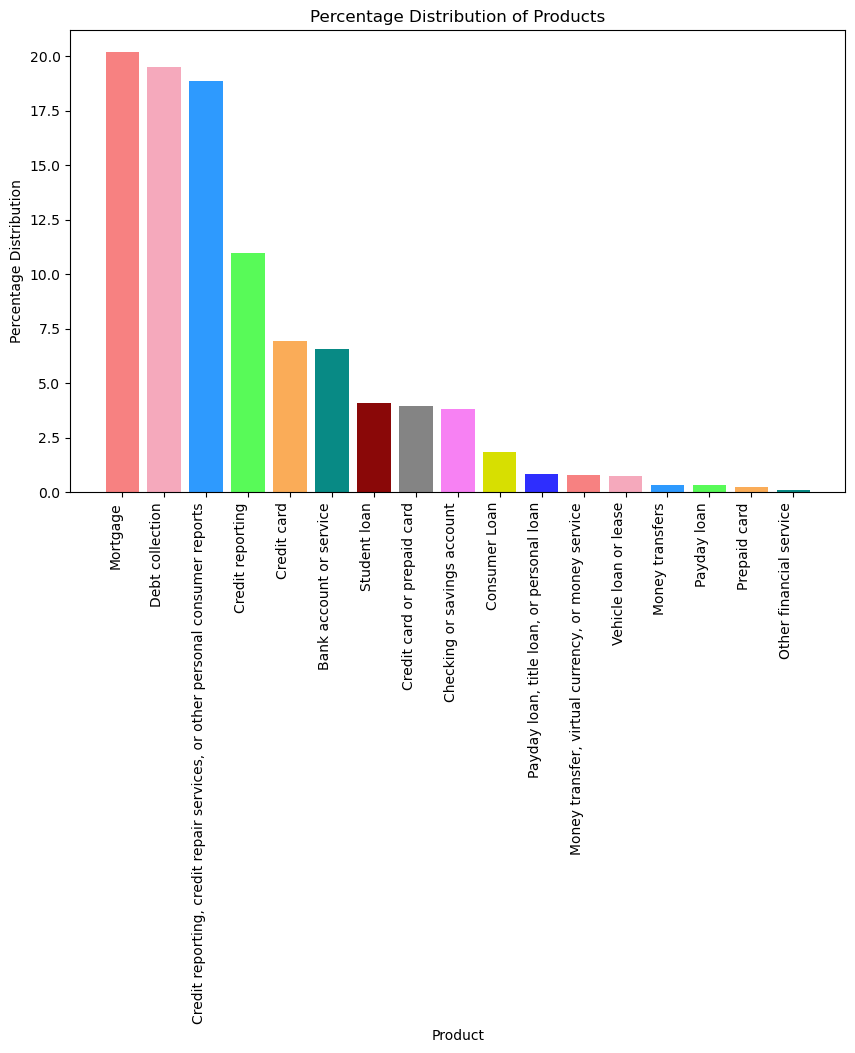

In [6]:
# Calculate the percentage distribution of 'Product' column
p_new_discussions = round(data["Product"].value_counts() / len(data["Product"]) * 100, 2)

# Extract the labels and values from the percentage distribution
labels = list(p_new_discussions.index)
values = p_new_discussions.values

# Define colors for the bar plot
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=colors)
plt.xlabel('Product')
plt.ylabel('Percentage Distribution')
plt.title('Percentage Distribution of Products')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

The code calculates the frequency count of unique values in the 'Company response to consumer' column of DataFrame data, resulting in a series with the most frequent value appearing first. This provides insights into the distribution and frequency of company responses to consumers.

In [7]:
# Calculate the value counts of 'Company response to consumer' column
response_counts = data['Company response to consumer'].value_counts()

# Print the value counts
print(response_counts)

Closed with explanation            15426
Closed with non-monetary relief     2579
Closed with monetary relief         1250
Closed without relief                265
Closed                               246
Untimely response                    110
Closed with relief                    73
In progress                           51
Name: Company response to consumer, dtype: int64


The code calculates the frequency count of each unique value in the 'Consumer disputed?' column of the DataFrame data, providing a Series with the unique values and corresponding frequency counts. The 'company_response' column calculates the frequency count of each unique value, providing a Series with the unique values and corresponding frequency counts. The top5_disputed and top5_nodispute columns filter the 'Company' column, selecting the top 5 companies with the highest frequency counts.

In [8]:
# Calculate the value counts of 'Consumer disputed?' column
disputed = data['Consumer disputed?'].value_counts()

# Calculate the value counts of 'Company response to consumer' column
company_response = data['Company response to consumer'].value_counts()

# Filter the data for cases where 'Consumer disputed?' is 'Yes' and get the top 5 companies with most disputes
top5_disputed = data[data['Consumer disputed?'] == 'Yes']['Company'].value_counts().head(5)

# Filter the data for cases where 'Consumer disputed?' is 'No' and get the top 5 companies with least disputes
top5_nodispute = data[data['Consumer disputed?'] == 'No']['Company'].value_counts().head(5)

The code calculates the frequency count of unique values in the 'Consumer disputed?', 'Company response to consumer', and 'Company' columns of the data DataFrame. It filters the 'Company' column based on the 'Consumer disputed?' column value and calculates the frequency count of each unique company in the filtered data. The [:5] indexing is used to select the top 5 companies with the highest frequency counts. These lines help analyze and extract important information from the 'Consumer disputed?', 'Company response to consumer', and 'Company' columns of the data DataFrame.

In [9]:
# Count the values of 'Consumer disputed?' column
disputed_counts = data['Consumer disputed?'].value_counts()

# Count the values of 'Company response to consumer' column
company_response_counts = data['Company response to consumer'].value_counts()

# Get the top 5 companies with disputed complaints
top5_disputed_companies = data[data['Consumer disputed?'] == 'Yes']['Company'].value_counts().nlargest(5)

# Get the top 5 companies with non-disputed complaints
top5_non_disputed_companies = data[data['Consumer disputed?'] == 'No']['Company'].value_counts().nlargest(5)


The code converts the 'Date received' column of DataFrame data to datetime format using the pd.to_datetime() function, treating the values as dates. This creates two new columns, 'Year received' and 'Month received', representing the year and month of each complaint. This allows for further analysis and visualization based on temporal aspects of the complaints data. The resulting DataFrame data will have the 'Date received' column as datetime objects and two new columns 'Year received' and 'Month received' containing the corresponding year and month values, respectively.

In [10]:
# Convert 'Date received' to datetime format
data['Date received'] = pd.to_datetime(data['Date received'])

# Check the data type of 'Date received' column
print(data['Date received'].dtype)

# Extract the 'Year received' and 'Month received'
data['Year received'] = data['Date received'].dt.year
data['Month received'] = data['Date received'].dt.month

# Display the first few rows of the updated DataFrame
print(data.head())

datetime64[ns]
  Date received                                            Product  \
0    2015-08-09                                   Credit reporting   
1    2019-12-23                                       Student loan   
2    2019-01-29  Credit reporting, credit repair services, or o...   
3    2015-08-19                                           Mortgage   
4    2016-03-04                                        Credit card   

                              Sub-product  \
0                                     NaN   
1          Federal student loan servicing   
2                        Credit reporting   
3  Conventional adjustable mortgage (ARM)   
4                                     NaN   

                                               Issue  \
0             Incorrect information on credit report   
1               Dealing with your lender or servicer   
2  Problem with a credit reporting company's inve...   
3           Loan servicing, payments, escrow account   
4            

The code sorts the data in the data DataFrame by 'Year received', 'Consumer disputed?', and 'Company', then applies the value_counts() function to count the occurrences of each company within each combination of year and dispute status. The result is a Series object with a multi-level index containing the counts of each company. The dictionary d is created with the key 'CRM' and the value as the sorting_groups Series object. The year_crm DataFrame is sorted by the 'CRM' column in descending order, and the modified DataFrame is renamed to 'company'. The next lines filter the crm_df DataFrame to extract disputes for the top 5 companies, Bank of America, Wells Fargo, JP Morgan, Equifax, and CitiBank, based on their company names and 'Consumer disputed?' column values.

In [11]:
# Group the data by 'Year received', 'Consumer disputed?', and 'Company', and count the occurrences
sorting_groups = data.groupby(['Year received', 'Consumer disputed?', 'Company']).size().reset_index(name='Count')

# Filter the DataFrame to get disputes for the top 5 companies: Bank of America, Wells Fargo, JP Morgan, Equifax, CitiBank
top_companies = ['Bank of America', 'Wells Fargo & Company', 'JPMorgan Chase & Co.', 'Equifax', 'Citibank']
top_companies_disputes = sorting_groups[sorting_groups['Company'].isin(top_companies) & (sorting_groups['Consumer disputed?'] == 'Yes')]

# Extract the years from the disputes of Bank of America
years = top_companies_disputes[top_companies_disputes['Company'] == 'Bank of America']['Year received'].values.tolist()

# Print the list of years
print(years)

[]


The code calculates disputes and non-disputes for each month of the year using the 'Consumer disputed?' column in the data DataFrame. It returns rows with the specified month and dispute status. Monthly Disputes calculates disputes from January to December, while Monthly No-Disputes calculates non-disputes from January to December. These variables can be used for analysis or visualization, such as creating a bar plot to compare disputes and non-disputes across different months.

In [12]:
# Months with the highest disputes (We will make a barplot)
def customerservice_per_month(month, dispute):
    result = data.loc[(data['Month received'] == month) & (data['Consumer disputed?'] == dispute)]
    return result

# Monthly Disputes
Monthly_Disputes_january = len(customerservice_per_month(month=1, dispute='Yes'))
Monthly_Disputes_february = len(customerservice_per_month(month=2, dispute='Yes'))
Monthly_Disputes_march = len(customerservice_per_month(month=3, dispute='Yes'))
Monthly_Disputes_april = len(customerservice_per_month(month=4, dispute='Yes'))
Monthly_Disputes_may = len(customerservice_per_month(month=5, dispute='Yes'))
Monthly_Disputes_june = len(customerservice_per_month(month=6, dispute='Yes'))
Monthly_Disputes_july = len(customerservice_per_month(month=7, dispute='Yes'))
Monthly_Disputes_august = len(customerservice_per_month(month=8, dispute='Yes'))
Monthly_Disputes_september = len(customerservice_per_month(month=9, dispute='Yes'))
Monthly_Disputes_october = len(customerservice_per_month(month=10, dispute='Yes'))
Monthly_Disputes_november = len(customerservice_per_month(month=11, dispute='Yes'))
Monthly_Disputes_december = len(customerservice_per_month(month=12, dispute='Yes'))

# Month-ly No-Disputes
Monthly_No_Disputes_january = len(customerservice_per_month(month=1, dispute='No'))
Monthly_No_Disputes_february = len(customerservice_per_month(month=2, dispute='No'))
Monthly_No_Disputes_march = len(customerservice_per_month(month=3, dispute='No'))
Monthly_No_Disputes_april = len(customerservice_per_month(month=4, dispute='No'))
Monthly_No_Disputes_may = len(customerservice_per_month(month=5, dispute='No'))
Monthly_No_Disputes_june = len(customerservice_per_month(month=6, dispute='No'))
Monthly_No_Disputes_july = len(customerservice_per_month(month=7, dispute='No'))
Monthly_No_Disputes_august = len(customerservice_per_month(month=8, dispute='No'))
Monthly_No_Disputes_september = len(customerservice_per_month(month=9, dispute='No'))
Monthly_No_Disputes_october = len(customerservice_per_month(month=10, dispute='No'))
Monthly_No_Disputes_november = len(customerservice_per_month(month=11, dispute='No'))
Monthly_No_Disputes_december = len(customerservice_per_month(month=12, dispute='No'))

# Data Visualisation

The code creates a Plotly bar chart to display the level of activity (disputes and no disputes) per month. It uses the go.Bar function to create two charts, one representing disputes and the other representing no disputes. The subplots figure is created using make_subplots, with titles set as 'Dispute Chart per Month' and 'No Dispute Chart per Month'. The append_trace function adds the disputes chart to the first subplot, and the layout and title are updated. The iplot function displays the Plotly figure, displaying the disputes and no disputes bar charts side by side.

In [13]:
# List of months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December']

In [14]:
# Data for disputes and no disputes by month
disputes_by_month = [Monthly_Disputes_january, Monthly_Disputes_february, Monthly_Disputes_march, Monthly_Disputes_april, Monthly_Disputes_may, Monthly_Disputes_june, Monthly_Disputes_july, Monthly_Disputes_august, Monthly_Disputes_september,
                     Monthly_Disputes_october, Monthly_Disputes_november, Monthly_Disputes_december]

nodisputes_by_month = [Monthly_No_Disputes_january, Monthly_No_Disputes_february, Monthly_No_Disputes_march, Monthly_No_Disputes_april, Monthly_No_Disputes_may, Monthly_No_Disputes_june, Monthly_No_Disputes_july,
                       Monthly_No_Disputes_august, Monthly_No_Disputes_september, Monthly_No_Disputes_october, Monthly_No_Disputes_november, Monthly_No_Disputes_december]

In [15]:
# Create a bar chart for disputes
disputes_chart = go.Bar(
    x=months,
    y=disputes_by_month,
    name='Disputes',
    marker=dict(
        color='#FF6464',
        line=dict(
            color='#CD3232',
            width=1.5
        )
    )
)

# Create the first plot for disputes
fig_disputes = go.Figure(data=[disputes_chart])
fig_disputes.update_layout(title="Dispute Chart per Month",
                           xaxis_title="Month",
                           yaxis_title="Number of Disputes")

# Display the plots
fig_disputes.show()

In [16]:
# Create a bar chart for no disputes
nodisputes_chart = go.Bar(
    x=months,
    y=nodisputes_by_month,
    name='No Disputes',
    marker=dict(
        color='#A9FFA9',
        line=dict(
            color='#59AF59',
            width=1.5
        )
    )
)

# Create the second plot for no disputes
fig_nodisputes = go.Figure(data=[nodisputes_chart])
fig_nodisputes.update_layout(title="No Dispute Chart per Month",
                             xaxis_title="Month",
                             yaxis_title="Number of No Disputes")

fig_nodisputes.show()

In [17]:
#pip install --upgrade pip

In [18]:
#pip install --upgrade Pillow

The code creates word clouds for main issues in disputes and non-disputes using the WordCloud library. Stopwords are used to exclude common English words, while main issues in disputes are stored in disputes_issue. The WordCloud function generates a word cloud for disputes, with a black background color and stopwords specified. A no dispute word cloud is created for main issues without disputes. Subplots are created using plt.figure, with disputed and no dispute subplots displayed. The plt.show() function displays the word clouds, allowing users to visualize the frequency and importance of different issues in the dataset.

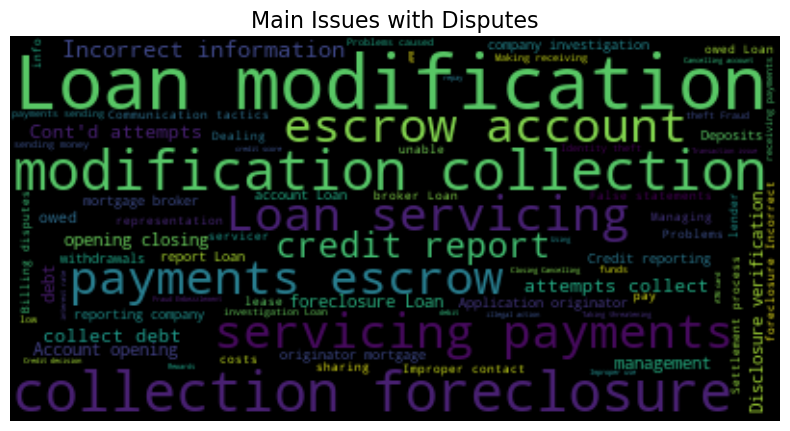

In [19]:
# Time for implementing word cloud
stopwords = set(STOPWORDS)

# Main Issue in Disputes
disputes_issue = data['Issue'].loc[data['Consumer disputed?'] == 'Yes']

# Generate word cloud for disputes
disputed_wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=300,  # Increase the number of words to display
    max_font_size=60,
    random_state=42
).generate(' '.join(disputes_issue))

# Create a plot for disputes word cloud
plt.figure(figsize=(10, 5))
plt.imshow(disputed_wordcloud, interpolation='bilinear')
plt.title('Main Issues with Disputes', fontsize=16)
plt.axis('off')
plt.show()

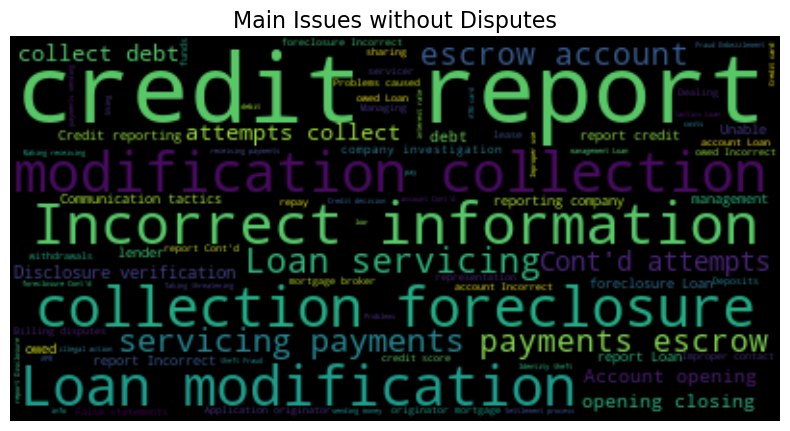

In [20]:
# Generate word cloud for no disputes
nodispute_issue = data['Issue'].loc[data['Consumer disputed?'] == 'No']

nodispute_wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=300,  # Increase the number of words to display
    max_font_size=60,
    random_state=42
).generate(' '.join(nodispute_issue))

# Create a plot for no disputes word cloud
plt.figure(figsize=(10, 5))
plt.imshow(nodispute_wordcloud, interpolation='bilinear')
plt.title('Main Issues without Disputes', fontsize=16)
plt.axis('off')
plt.show()

The code generates subplots of word clouds for disputes related to specific companies using data extraction, creating subplots, and generating word clouds. The code uses variables boa_dis, wfc_dis, jpm_dis, equi_dis, and citi_dis to store text data related to disputes for specific companies. The generated word clouds are stored in variables specific to each subplot. The plt.imshow function displays each word cloud, while the plt.title function sets a title for each subplot based on the company name. The plt.axis('off') command removes axes and ticks from each subplot.

The fig variable sets the overall size of the figure. This code generates a figure with multiple subplots, each displaying a word cloud representing the main issues associated with disputes for a specific company.

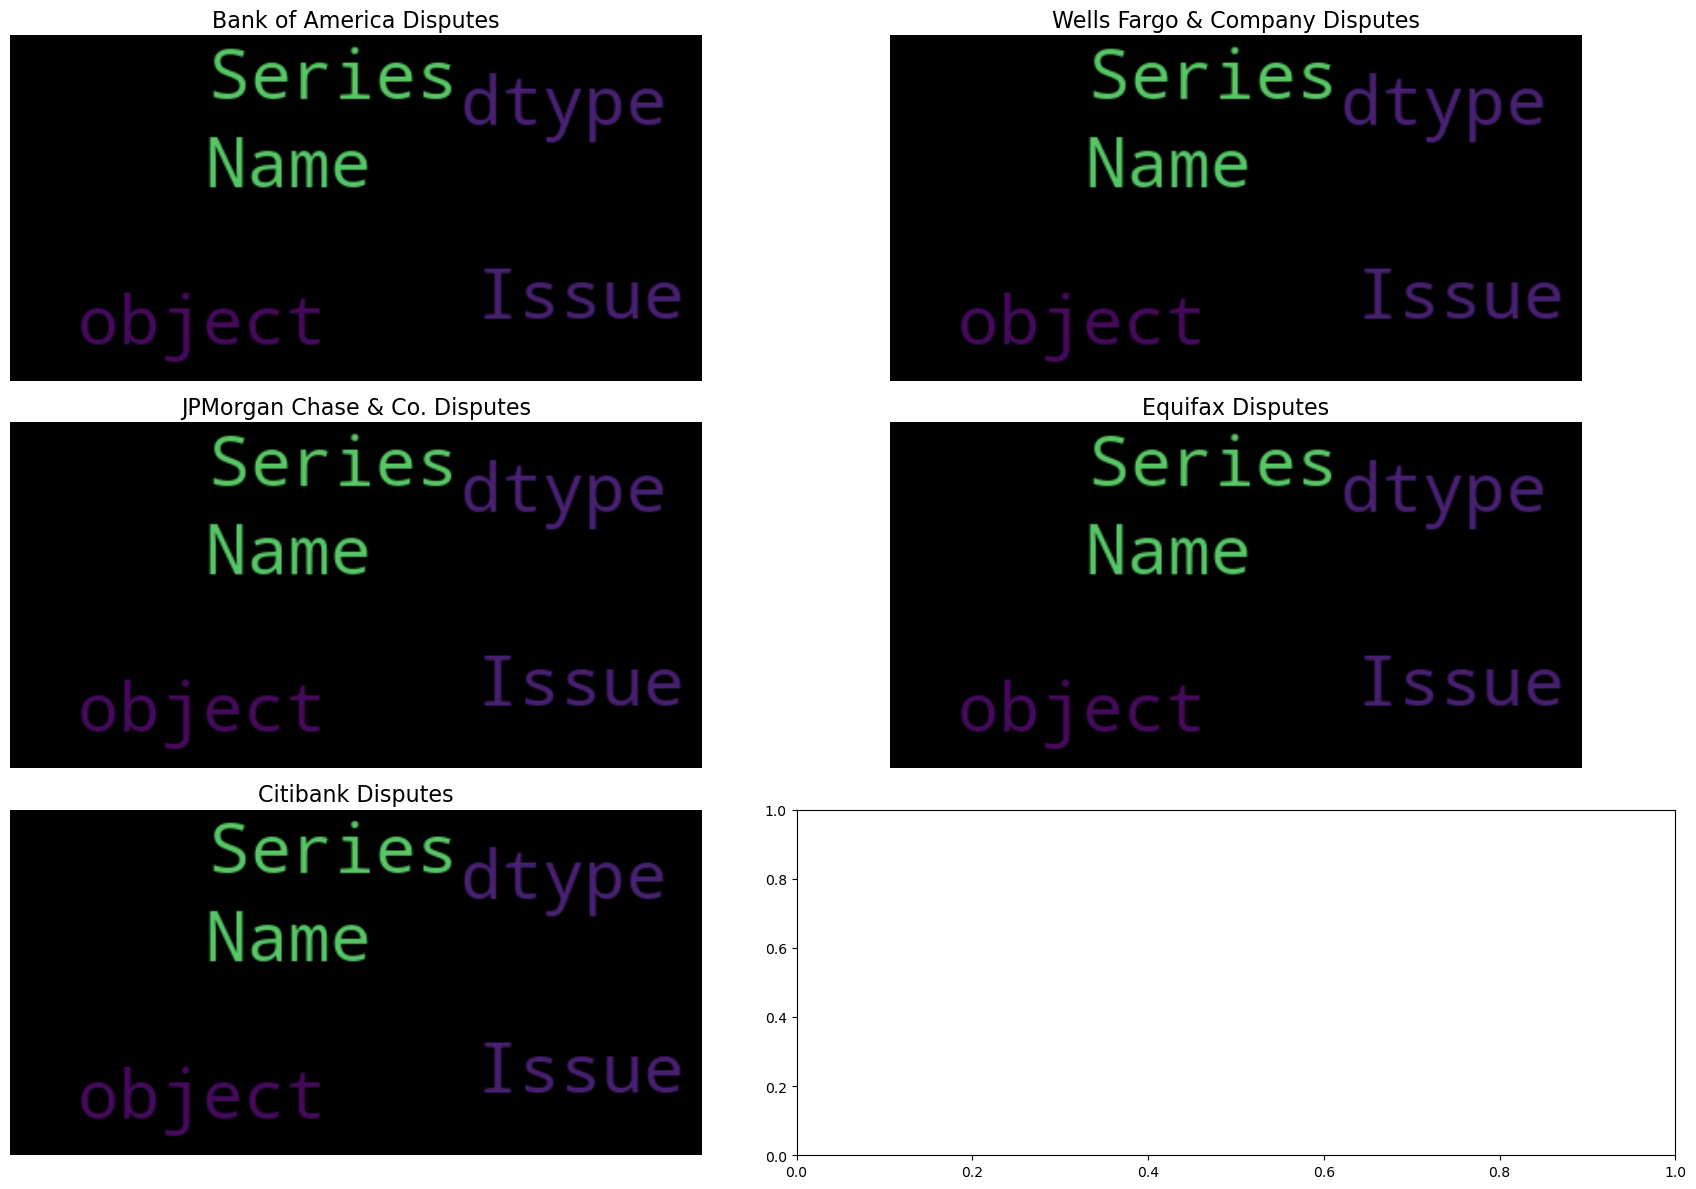

In [21]:
fig, axs = plt.subplots(3, 2, figsize=(18, 12))

# List of companies
companies = ['Bank of America', 'Wells Fargo & Company', 'JPMorgan Chase & Co.', 'Equifax', 'Citibank']
disputed_wordclouds = {}

# Generate word clouds for each company and add them to the dictionary
for i, company in enumerate(companies):
    company_dis = data['Issue'].loc[(data['Consumer disputed?'] == 'Yes') & (data['Company'] == company)]
    wordcloud = WordCloud(
        background_color='black',  # Set background color to black
        stopwords=stopwords,
        max_words=1000,  # Increase max_words to plot more words
        max_font_size=40,
        random_state=42
    ).generate(str(company_dis))
    disputed_wordclouds[company] = wordcloud
    axs[i // 2, i % 2].imshow(wordcloud, interpolation='bilinear')  # Use bilinear interpolation for better image quality
    axs[i // 2, i % 2].set_title(company + ' Disputes', fontsize=16)
    axs[i // 2, i % 2].axis('off')

plt.tight_layout()
plt.show()

In [22]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year received,Month received
0,2015-08-09,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,Company chooses not to provide a public response,Experian Information Solutions Inc.,NJ,08872,NaN,Consent not provided,Web,08/09/2015,Closed with non-monetary relief,Yes,No,1509954,2015,8
1,2019-12-23,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Trouble with how payments are being handled,NaN,NaN,AES/PHEAA,MA,019XX,NaN,NaN,Web,12/23/2019,Closed with explanation,Yes,NaN,3475943,2019,12
2,2019-01-29,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",NY,10801,NaN,Consent not provided,Web,01/30/2019,Closed with non-monetary relief,Yes,NaN,3136759,2019,1
3,2015-08-19,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CA,94526,NaN,Consent not provided,Web,08/19/2015,Closed with explanation,Yes,No,1527601,2015,8
4,2016-03-04,Credit card,NaN,Billing disputes,NaN,I am dissatisfied with the current outcome of ...,NaN,DISCOVER BANK,NV,891XX,NaN,Consent provided,Web,03/04/2016,Closed with explanation,Yes,Yes,1816726,2016,3


The code calculates cross-tabulation between 'State' and 'Company' columns for complaints where 'Consumer disputed?' is 'Yes'. The pd.crosstab function calculates the count of complaints for each combination of 'State' and 'Company'. The apply function calculates the percentage of complaints for each company within each state, resulting in a cross_month dataframe with the percentage distribution of complaints for each company within each state. This analysis helps understand the distribution of complaints among states and companies, providing insights into which states and companies have a higher presence of consumer disputes.

In [23]:
# Filter the data for disputed complaints
dispute_presence = data[data['Consumer disputed?'] == 'Yes']

# Group the data by 'State' and 'Company' and calculate the count of occurrences
grouped_data = dispute_presence.groupby(['State', 'Company']).size().reset_index(name='Count')

# Pivot the table to get the cross tabulation with percentages
cross_month = grouped_data.pivot_table(index='State', columns='Company', values='Count', aggfunc='sum', fill_value=0)

# Calculate the percentages for each state and company
cross_month_percentages = cross_month.apply(lambda x: x / x.sum() * 100, axis=1)

# Display the result
print(cross_month_percentages)

Company  21ST MORTGAGE CORP.  ACE CASH EXPRESS, INC.  ACS Education Services  \
State                                                                          
AE                  0.000000                0.000000                0.000000   
AK                  0.000000                0.000000                0.000000   
AL                  0.000000                0.000000                0.000000   
AP                  0.000000                0.000000                0.000000   
AR                  0.000000                0.000000                0.000000   
AZ                  0.000000                0.000000                0.000000   
CA                  0.283286                0.000000                0.000000   
CO                  0.000000                0.000000                0.000000   
CT                  0.000000                0.000000                0.000000   
DC                  0.000000                0.000000                0.000000   
DE                  0.000000            

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date received                 20000 non-null  datetime64[ns]
 1   Product                       20000 non-null  object        
 2   Sub-product                   16356 non-null  object        
 3   Issue                         20000 non-null  object        
 4   Sub-issue                     12184 non-null  object        
 5   Consumer complaint narrative  6335 non-null   object        
 6   Company public response       7292 non-null   object        
 7   Company                       20000 non-null  object        
 8   State                         19700 non-null  object        
 9   ZIP code                      18231 non-null  object        
 10  Tags                          2691 non-null   object        
 11  Consumer consent provided?  

# Label encoding

The code imports the sklearn.preprocessing module and creates a LabelEncoder object to encode categorical labels into numerical values. The fit_transform() method encodes each column individually, transforming them into numerical labels. This encoding is crucial for machine learning algorithms requiring numerical inputs.

In [25]:
# Import label encoder
from sklearn import preprocessing

# Columns to encode
columns_to_encode = ['Product', 'Issue', 'Company', 'Submitted via', 'Date sent to company',
                     'Company response to consumer', 'Timely response?']

# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Loop through the columns and encode the labels
for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

# Display the updated DataFrame
print(data.head())

  Date received  Product                             Sub-product  Issue  \
0    2015-08-09        5                                     NaN     73   
1    2019-12-23       15          Federal student loan servicing     51   
2    2019-01-29        6                        Credit reporting    108   
3    2015-08-19       10  Conventional adjustable mortgage (ARM)     80   
4    2016-03-04        3                                     NaN     18   

                                           Sub-issue  \
0                            Information is not mine   
1        Trouble with how payments are being handled   
2  Was not notified of investigation status or re...   
3                                                NaN   
4                                                NaN   

                        Consumer complaint narrative  \
0                                                NaN   
1                                                NaN   
2                                           

The code performs text preprocessing on the 'Issue' column of the data dataframe using data['Issue']. It applies the astype(str) function to convert all values to strings, and applies the lowercase transformation using the apply() function. The resulting list of lowercase words is joined back into a string, ensuring consistency for further text processing and analysis tasks.

In [26]:
# Text Preprocessing
data['Issue'] = data['Issue'].astype(str).apply(lambda x: ' '.join([word.lower() for word in x.split()]))

# NLP Techniques

# Tokenization and Vectorization

The code preprocesses the 'Issue' column in the data dataframe by applying the.astype(str) function to convert all values to strings. The.apply() function applies a lambda function to each value, splitting it into a list of words and applying the word.lower() function to convert each word to lowercase. The resulting list is joined back into a string using the join() function. This ensures consistent text for further processing and analysis tasks.

In [27]:
# Text Preprocessing
data['Issue'] = data['Issue'].astype(str).apply(lambda x: ' '.join([word.lower() for word in x.split()]))

The code snippet performs a train-test split on data, assigning feature and target variables X and Y. The function splits the data into training and testing sets, with a test_size parameter of 0.2 and a random_state parameter of 42. The splits are assigned to four variables: X_train, X_test, y_train, and y_test. These sets are used for training and evaluating machine learning models, with X_train and y_train for training and X_test and y_test for evaluation.

In [28]:
from sklearn.model_selection import train_test_split

X = data['Issue']
y = data['Company response to consumer']

# Split the data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The code snippet uses the TfidfVectorizer() class to create a TF-IDF vectorizer for text data tokenization and vectorization. The fit_transform() method transforms training data X_train into a TF-IDF representation, tokenizing the text, calculating term frequencies, and applying IDF weighting. The resulting TF-IDF matrix is assigned to X_train_tfidf. The transform() method transforms test data X_test into a TF-IDF representation based on the learned vocabulary. These TF-IDF representations can be used as input for machine learning models.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)


The code snippet uses the CountVectorizer technique to convert text data into token counts. It applies the fit_transform() method to training data X_train, which is transformed into a count matrix. The resulting count matrix is assigned to X_train_count. The same transform() method is applied to test data X_test, transforming it into a count matrix based on the learned vocabulary. These count matrices represent the frequency of each token in the text data and can be used for machine learning models.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_count = count_vectorizer.transform(X_test)

The code converts TF-IDF and count matrix representations of training and test data to sparse matrices using the csr_matrix() function from the scipy.sparse module. This efficiently represents data by storing only non-zero values, making it useful for large datasets with many zero values. The resulting sparse matrix is assigned to the variable X_train_tfidf_sparse and X_test_tfidf_sparse.

In [31]:
from scipy.sparse import csr_matrix

# Convert TF-IDF representations to sparse matrices
X_train_tfidf_sparse = csr_matrix(X_train_tfidf)
X_test_tfidf_sparse = csr_matrix(X_test_tfidf)

# Convert Count vector representations to sparse matrices
X_train_count_sparse = csr_matrix(X_train_count)
X_test_count_sparse = csr_matrix(X_test_count)

In [32]:
X_train_count_sparse

<16000x141 sparse matrix of type '<class 'numpy.int64'>'
	with 15101 stored elements in Compressed Sparse Row format>

In [33]:
X_test_count_sparse

<4000x141 sparse matrix of type '<class 'numpy.int64'>'
	with 3784 stored elements in Compressed Sparse Row format>

The function visualize_sparsity visualizes the sparsity pattern of a sparse matrix by creating a 10x8 figure and plotting it as a heatmap. The colormap 'binary' represents non-zero values as white and zero values as black. The title and x-axis labels are set as 'Features' and 'Samples, respectively.' The plot is displayed using plt.show().

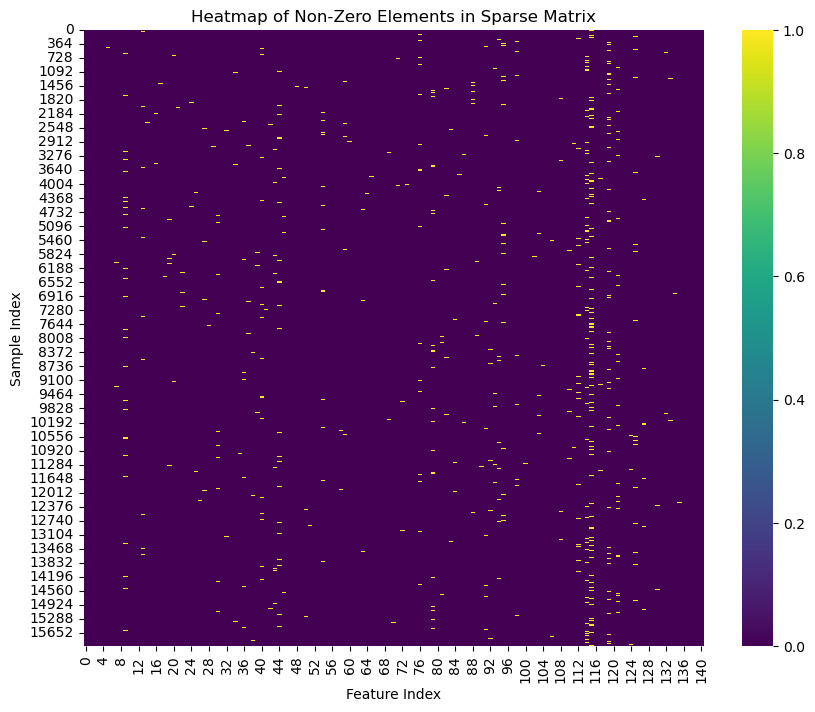

In [34]:
# Assuming you have already created the sparse matrix
X_train_tfidf_sparse = csr_matrix(X_train_tfidf)

# Convert the sparse matrix to a dense array for plotting
X_train_tfidf_dense = X_train_tfidf_sparse.toarray()

# Plot the heatmap of the non-zero elements
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_tfidf_dense, cmap='viridis', annot=False, fmt='.2f')
plt.title("Heatmap of Non-Zero Elements in Sparse Matrix")
plt.xlabel("Feature Index")
plt.ylabel("Sample Index")
plt.show()

# Models

In [35]:
X_columns = ['Product', 'Issue', 'Company', 'Submitted via', 'Date sent to company', 'Timely response?', 'Month received', 'Year received', 'Complaint ID']
X = data.iloc[:, data.columns.isin(X_columns)]
y = data['Company response to consumer']

# Train Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Create SVM classifier
svm = SVC()

# Create Random Forest classifier
rf = RandomForestClassifier()

# Create Naive Bayes classifier
nb = GaussianNB()

In [47]:
from sklearn.model_selection import GridSearchCV

# Create SVM classifier with the initial set of hyperparameters
svm = SVC()

# Define the hyperparameters you want to tune
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 0.01]  # Kernel coefficient for 'rbf' kernel
}

# Create GridSearchCV object with the SVM classifier and hyperparameters
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data to find the best hyperparameters
grid_search_svm.fit(X_train_tfidf, y_train)

# Get the best hyperparameters found by GridSearchCV
best_params_svm = grid_search_svm.best_params_

# Create SVM classifier with the best hyperparameters
svm_best = SVC(**best_params_svm)

# Train the SVM classifier with the best hyperparameters on the training data
svm_best.fit(X_train_tfidf, y_train)

SVC(C=1, gamma=0.1)

In [48]:
# Make predictions on the test set using the SVM classifier with best hyperparameters
y_pred_svm = svm_best.predict(X_test_tfidf)

# Import the necessary library for classification report
from sklearn.metrics import classification_report

# Print the classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.77      1.00      0.87      3090
           2       0.75      0.02      0.05       243
           3       0.00      0.00      0.00       529
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        45
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        22

    accuracy                           0.77      4000
   macro avg       0.19      0.13      0.12      4000
weighted avg       0.64      0.77      0.68      4000



In [ ]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

In [38]:
# Train the SVM classifier
svm.fit(X_train, y_train)

# Train the Random Forest classifier
rf.fit(X_train, y_train)


# Train the Naive Bayes classifier
nb.fit(X_train, y_train)

GaussianNB()

In [39]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Make predictions on the test set
y_pred_nb = nb.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

# Classification Report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Classification Report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Classification Report for Naive Bayes
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.77      1.00      0.87      3090
           2       0.00      0.00      0.00       243
           3       0.00      0.00      0.00       529
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00        45
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        22

    accuracy                           0.77      4000
   macro avg       0.10      0.12      0.11      4000
weighted avg       0.60      0.77      0.67      4000

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.25      0.04      0.07        49
           1       0.81      0.93      0.87      3090
           2       0.27      0.10      0.14       243
           3       0.41      0.22      0.29       529
      

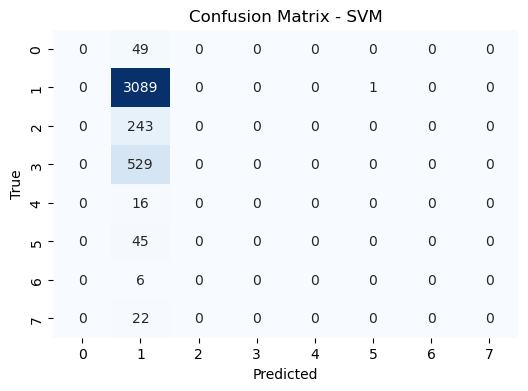

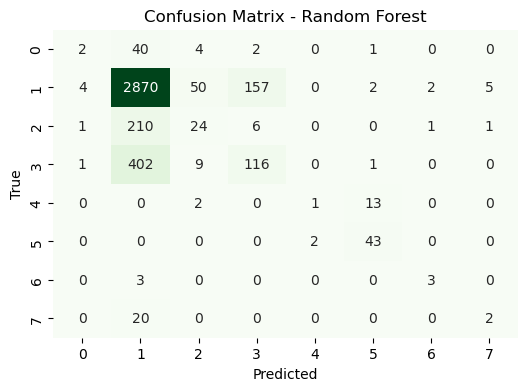

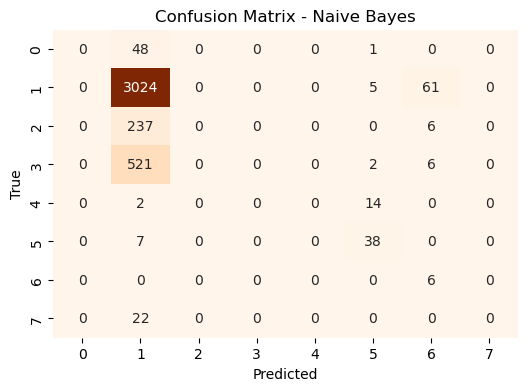

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

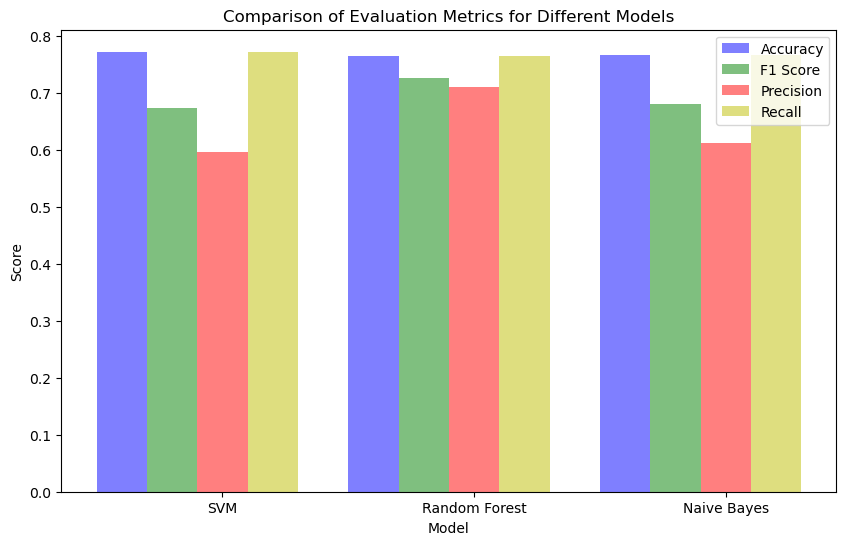

In [44]:
# Calculate the evaluation metrics for each model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1_score = f1_score(y_test, y_pred_svm, average='weighted')
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1_score = f1_score(y_test, y_pred_rf, average='weighted')
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')

nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_f1_score = f1_score(y_test, y_pred_nb, average='weighted')
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')

# Create lists to hold the values for each metric
models = ['SVM', 'Random Forest', 'Naive Bayes']
accuracy_values = [svm_accuracy, rf_accuracy, nb_accuracy]
f1_score_values = [svm_f1_score, rf_f1_score, nb_f1_score]
precision_values = [svm_precision, rf_precision, nb_precision]
recall_values = [svm_recall, rf_recall, nb_recall]

# Create positions for the bars
bar_width = 0.2
index = np.arange(len(models))

# Create a bar plot for each metric
plt.figure(figsize=(10, 6))
plt.bar(index, accuracy_values, width=bar_width, color='b', alpha=0.5, label='Accuracy')
plt.bar(index + bar_width, f1_score_values, width=bar_width, color='g', alpha=0.5, label='F1 Score')
plt.bar(index + 2*bar_width, precision_values, width=bar_width, color='r', alpha=0.5, label='Precision')
plt.bar(index + 3*bar_width, recall_values, width=bar_width, color='y', alpha=0.5, label='Recall')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics for Different Models')
plt.xticks(index + 2*bar_width, models)
plt.legend()
plt.show()

In [45]:

# Customer complaints
complaints = [
    "The mortgage process was extremely slow and inefficient.",
    "The debt collector harassed me with constant phone calls.",
    "The credit reporting agency provided inaccurate information on my report.",
    "I was charged unauthorized fees on my credit card.",
    "The bank closed my account without any explanation.",
    "I have been experiencing issues with my credit card payments.",
    "The student loan servicer is unresponsive and unhelpful.",
    "I noticed suspicious activity in my checking account.",
    "The consumer loan I received had hidden fees and high interest rates.",
    "The vehicle lease agreement was misleading and unfair."
]
df_complaints = pd.DataFrame(complaints, columns=["Complaint"])

In [46]:
Predicted_topics = [
    "Mortgage",
    "Debt collection",
    "Credit reporting, credit repair services",
    "Credit card",
    "Bank account or service",
    "Credit card or prepaid card",
    "Student loan",
    "Checking or savings account",
    "Consumer Loan",
    "Vehicle loan or lease"
]
df = pd.DataFrame({'Complaint': complaints, 'Predicted topics': Predicted_topics})
print(df)

                                           Complaint  \
0  The mortgage process was extremely slow and in...   
1  The debt collector harassed me with constant p...   
2  The credit reporting agency provided inaccurat...   
3  I was charged unauthorized fees on my credit c...   
4  The bank closed my account without any explana...   
5  I have been experiencing issues with my credit...   
6  The student loan servicer is unresponsive and ...   
7  I noticed suspicious activity in my checking a...   
8  The consumer loan I received had hidden fees a...   
9  The vehicle lease agreement was misleading and...   

                           Predicted topics  
0                                  Mortgage  
1                           Debt collection  
2  Credit reporting, credit repair services  
3                               Credit card  
4                   Bank account or service  
5               Credit card or prepaid card  
6                              Student loan  
7              